# Blockchain development research

- This is a research of popularity and features of various different blockchain development
  by analysing the questions and answers on the world number one programmer forum StackOverflow
- For updates [subscribe to newsletter](https://tradingstrategy.ai/community) or
  [follow on Twitter](https://tradingstrategy.ai/community)

In [64]:
import pandas as pd

from blockchain_stackoverflow import entertain_me
from blockchain_stackoverflow.helpers import clip_to_data_available_period

# Initialise notebook output
entertain_me()  

# Load our data
df = pd.read_parquet("blockchain-questions.parquet")
df = clip_to_data_available_period(df)

# StackOverflow - overall popularity

- We know the popularity of StackOverflow is in decline
- We need to calibrate any declining popularity in blockchain tech 
  to the overall declining popularity of StackOverflow

Text(0, 0.5, 'All StackOverflow posts per quarter')

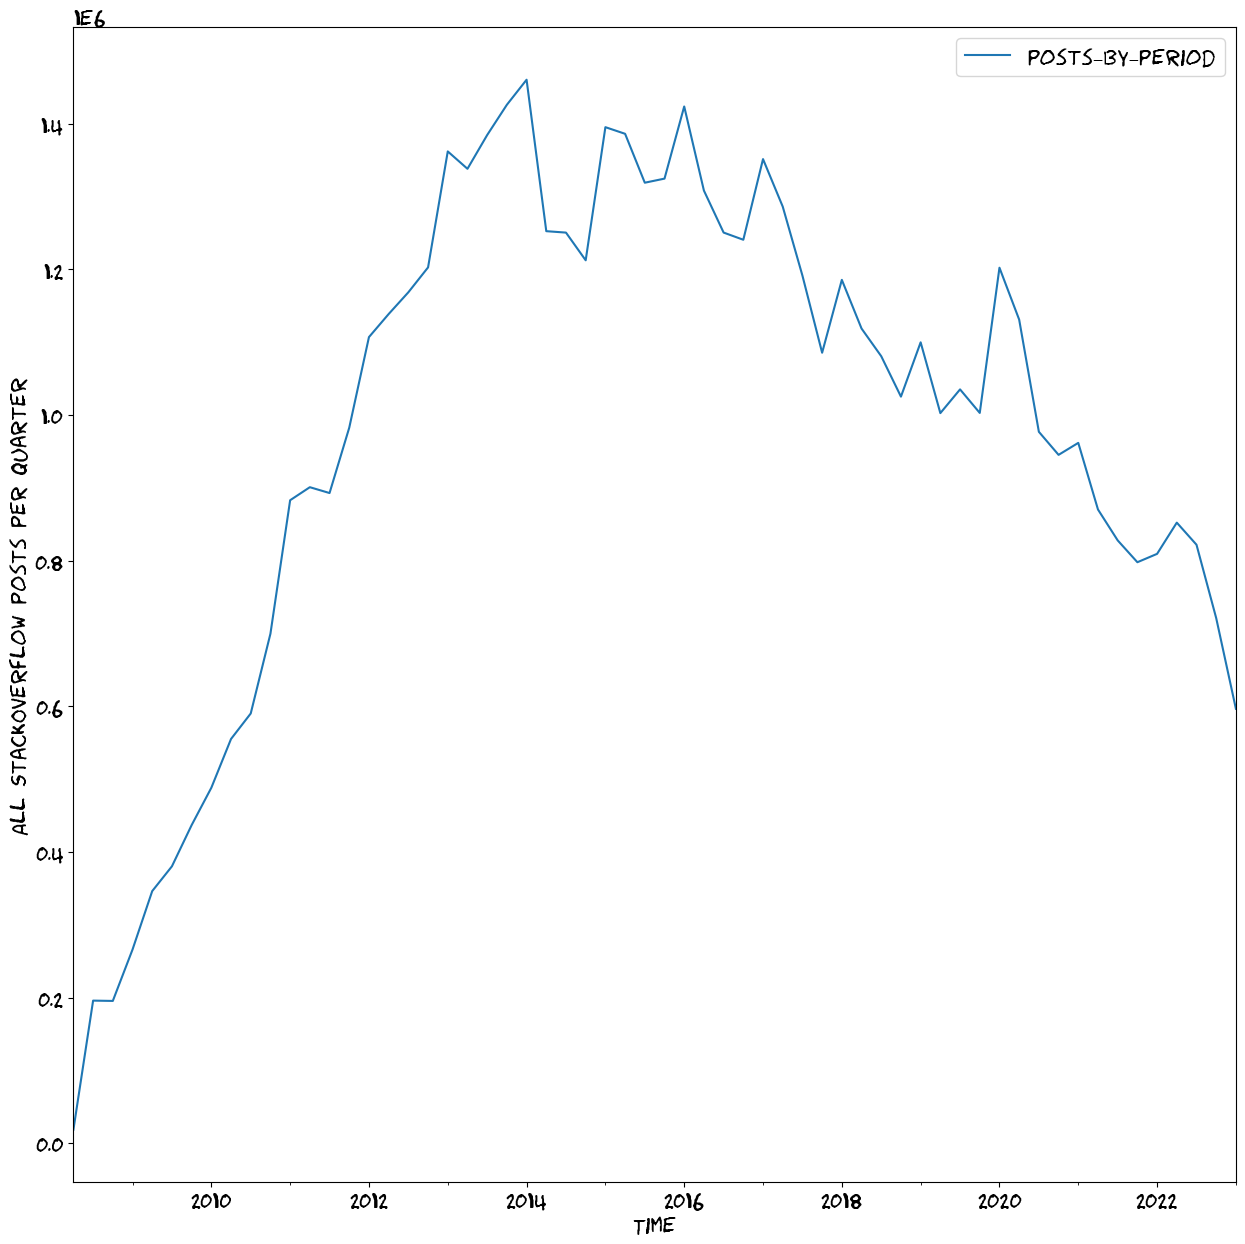

In [65]:
all_posts_quarterly = pd.read_parquet("post_counts_quarterly.parquet")
all_posts_quarterly = all_posts_quarterly[:pd.Timestamp("2023-05-31")]

ax = all_posts_quarterly.plot.line()
ax.set_xlabel("Time")
ax.set_ylabel("All StackOverflow posts per quarter")

## Blockchains - top developer interest

Plot the popularity of top three blockchains, as inferred from the domain specific knowledge.

- Ethereum, Bitcoin, Solana and Near Protocol have so much developer interest that it does not make sense
  to plot them on the same scale with the other chains

**Note**: This chart is absolute post numbers and not adjusted to the overall decline of StackOverflow.

Text(0, 0.5, 'Top blockchain StackOverflow posts per quarter')

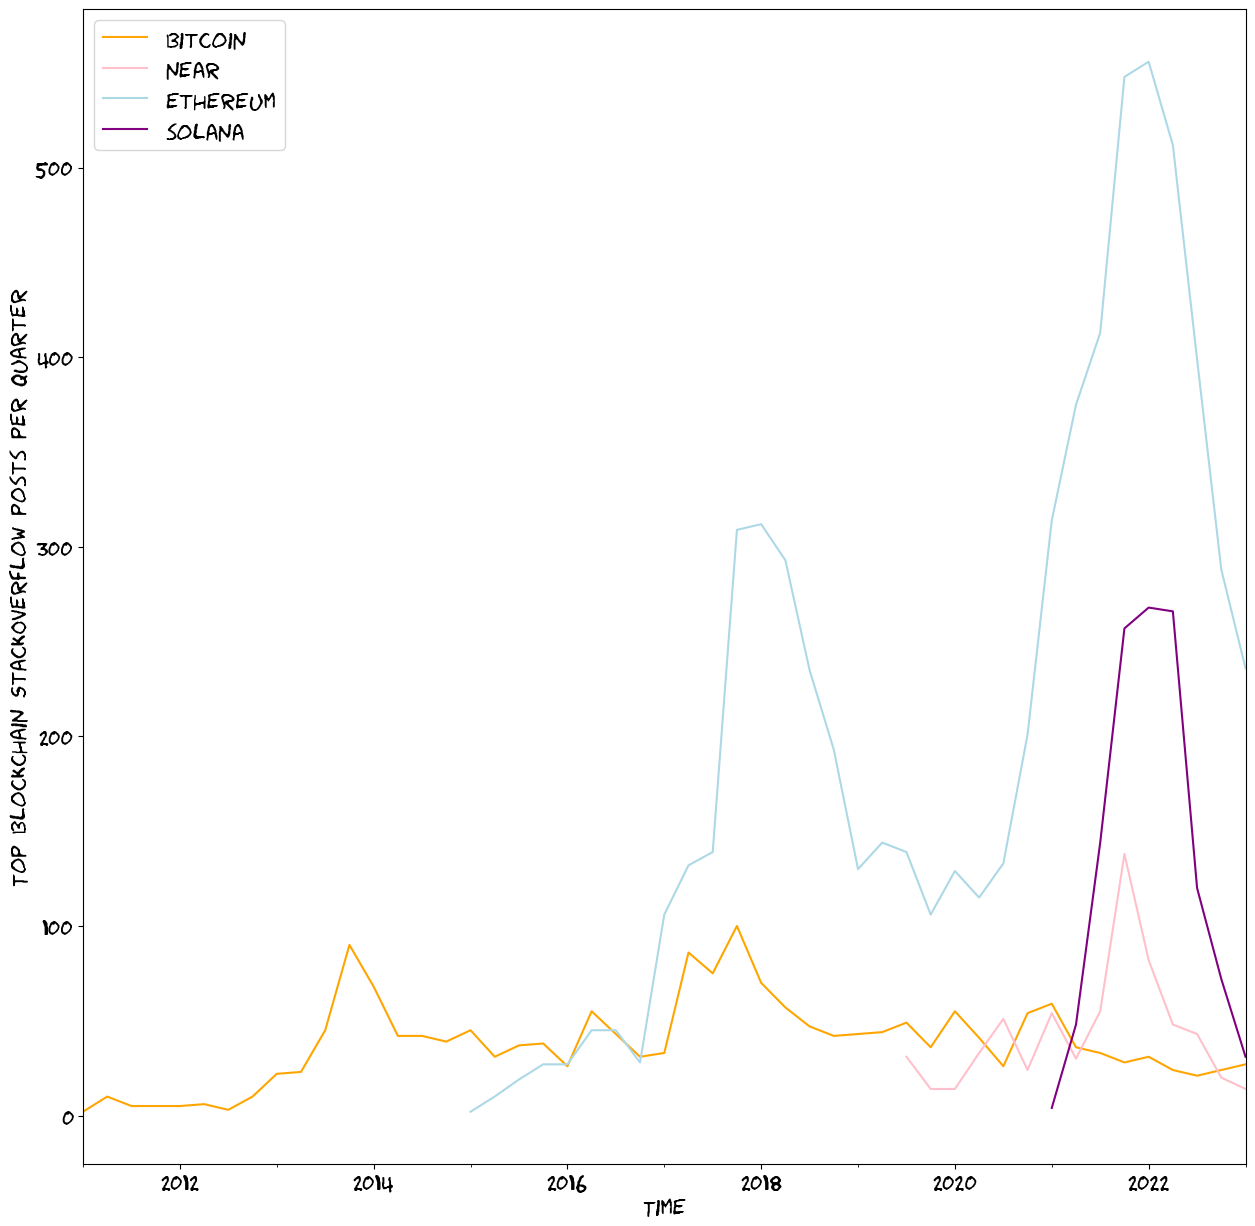

In [66]:
from blockchain_stackoverflow.helpers import create_binned_df_by_tags

quaterly_binned = create_binned_df_by_tags(df, {
    "bitcoin": ("bitcoin", "bitcoind", "bitcoinj"),
    "near": ("nearprotocol", "near"),
    "ethereum": ("ethereum",),
    "solana": ("solana", "solana-cli"),
})

ax = quaterly_binned.plot.line(
    color={
        "bitcoin": "orange",
        "ethereum": "lightblue",
        "solana": "purple",
        "near": "pink",
    }
)

ax.set_xlabel("Time")
ax.set_ylabel("Top blockchain StackOverflow posts per quarter")

## Adjusted top developer interest 

- Here we present blockchain posts as % overall posts of StackOverflow
- This accounts for any general trends of StackOverflow usage
- We find out there is no significant change in the trends



In [67]:
# How many % of all SO.com question we are
adjusted_quaterly_binned = quaterly_binned.div(all_posts_quarterly["posts_by_period"], axis="index") * 100
adjusted_quaterly_binned = adjusted_quaterly_binned.loc[pd.Timestamp("2012-01-01"):]

Text(0, 0.5, 'Top blockchain posts - StackOverflow popularity adjusted')

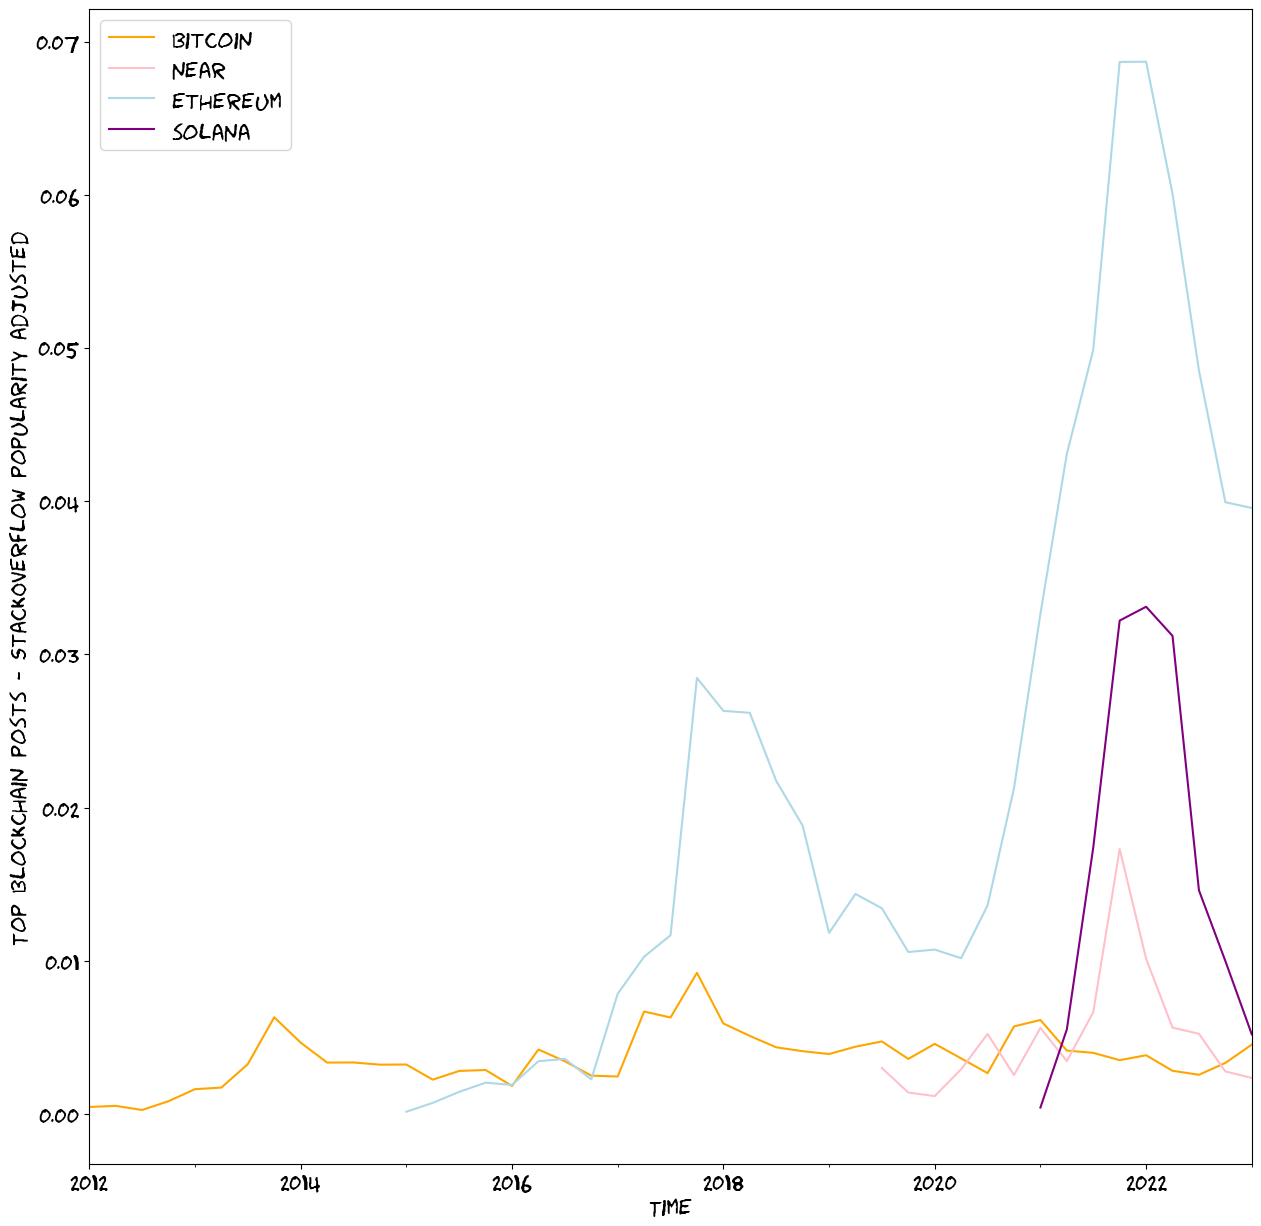

In [68]:

ax = adjusted_quaterly_binned.plot.line(
    color={
        "bitcoin": "orange",
        "ethereum": "lightblue",
        "solana": "purple",
        "near": "pink",
    }
)

ax.set_xlabel("Time")
ax.set_ylabel("Top blockchain posts - StackOverflow popularity adjusted")

# Kindlings

- New blockchains that are gaining traction, have not yet gained traction or never gained traction
- These are plot on their own chart, as the axis would be too much skewed by the top blockchains
- As 2023, none of these chains seem to have had significant developer activity on StackOverflow

Text(0, 0.5, 'StackOverflow posts per quarter')

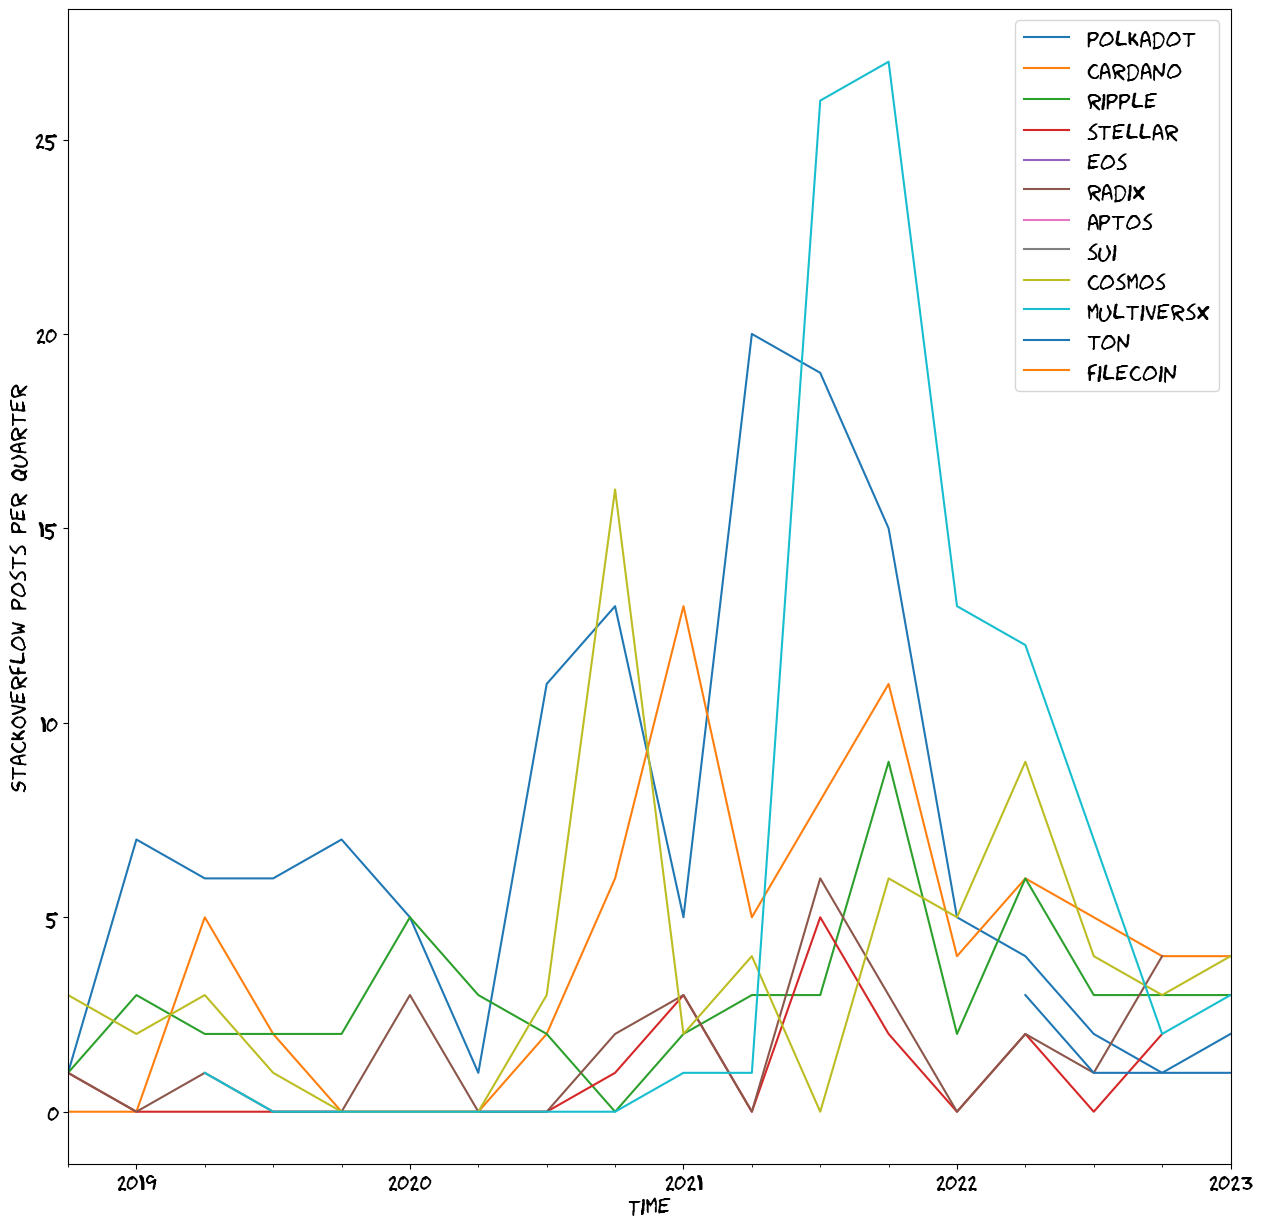

In [69]:

quaterly_binned = create_binned_df_by_tags(df, {
    "polkadot": ("polkadot", "substrate", "polkadot-js"),
    "cardano": ("cardano",),
    "ripple": ("xrp", "rippled"),
    "stellar": ("stellar"),
    "eos": ("eos"),
    "radix": ("scrypto"),
    "aptos": ("aptos"),
    "sui": ("sui"),
    "cosmos": ("cosmos-sdk", "cosmwasm", "tendermint"),
    "multiversx": ("elrond",),
    "ton": ("ton",),
    "filecoin": ("filecoin",),
    "hedera": ("hedera", "hedera-hashgraph",),
})

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Centralised exchanges developer interest

- We compare centralised exchange developer questions
- These are related to CEX APIs and automated trading
- This gives perspective whether or not infrastructure technology is winning
- We bin yearly because low activitity

Text(0, 0.5, 'StackOverflow posts per quarter')

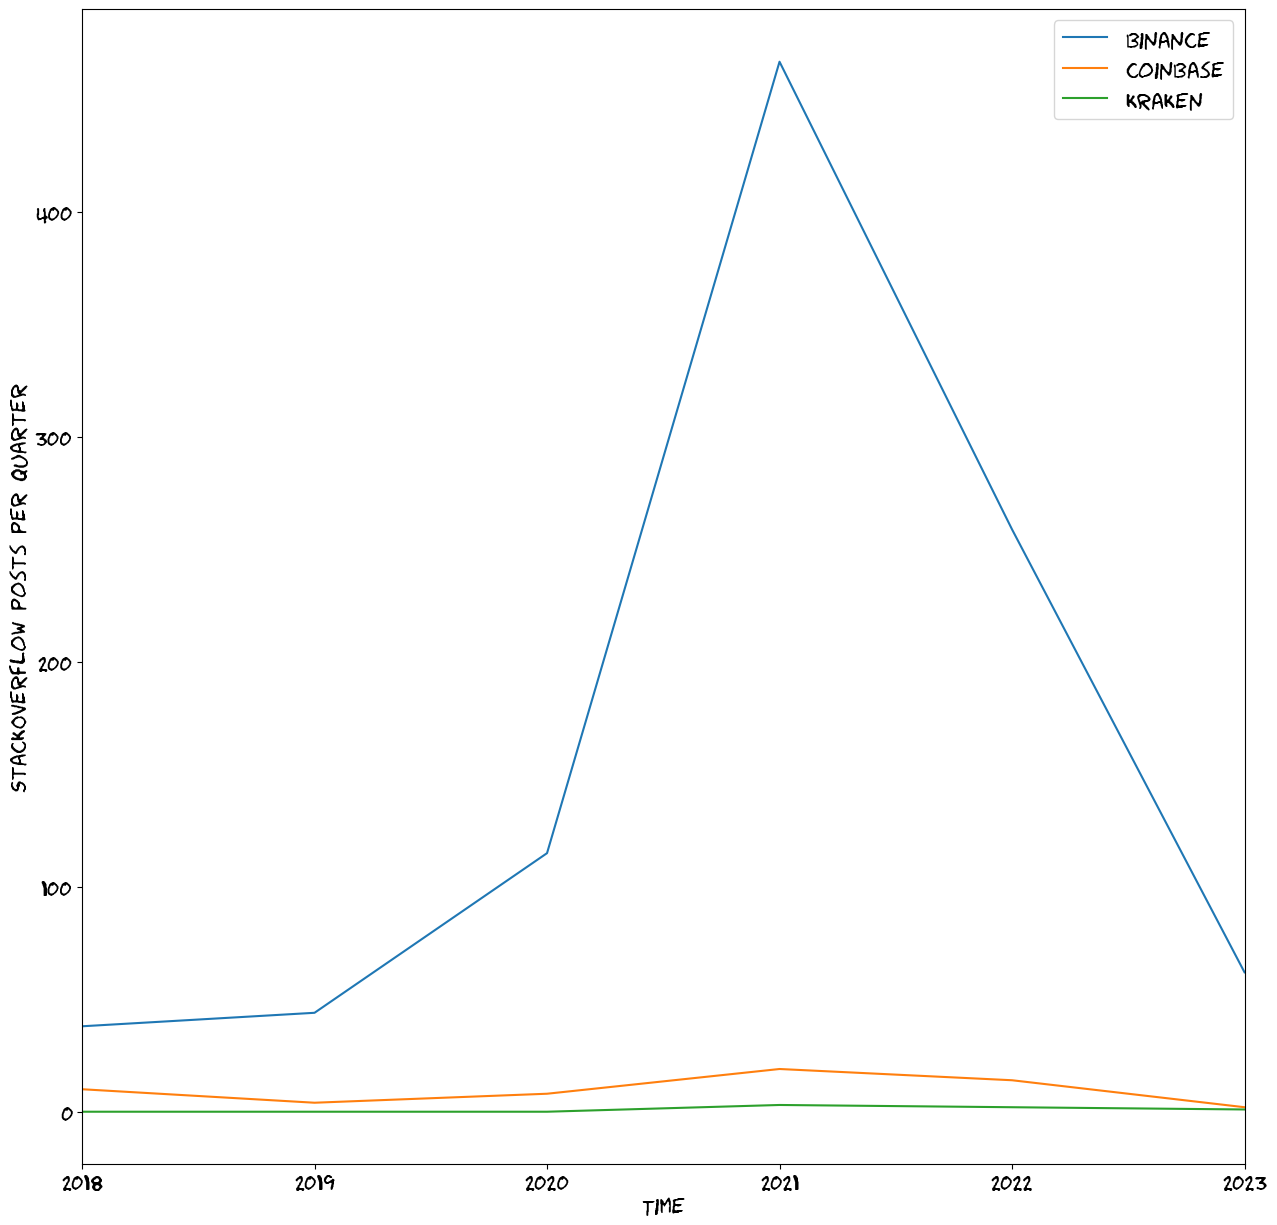

In [73]:

yearly_binned = create_binned_df_by_tags(
    df, 
    {
        "binance": ("binance",),
        "coinbase": ("coinbase-api",),
        "kraken": ("kraken.com",),
    }, 
    frequency=pd.offsets.YearBegin(),
)

ax = yearly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per year")



# Binance Smart Chain vs. Ethereum

- Binance Smart Chain is a popular EVM-compatible clone chain due to push from Binance (50% CEX market share) 
- We do few comparisons with Binance branded tags against their native Ethereum counterparts

Text(0, 0.5, 'StackOverflow posts per quarter')

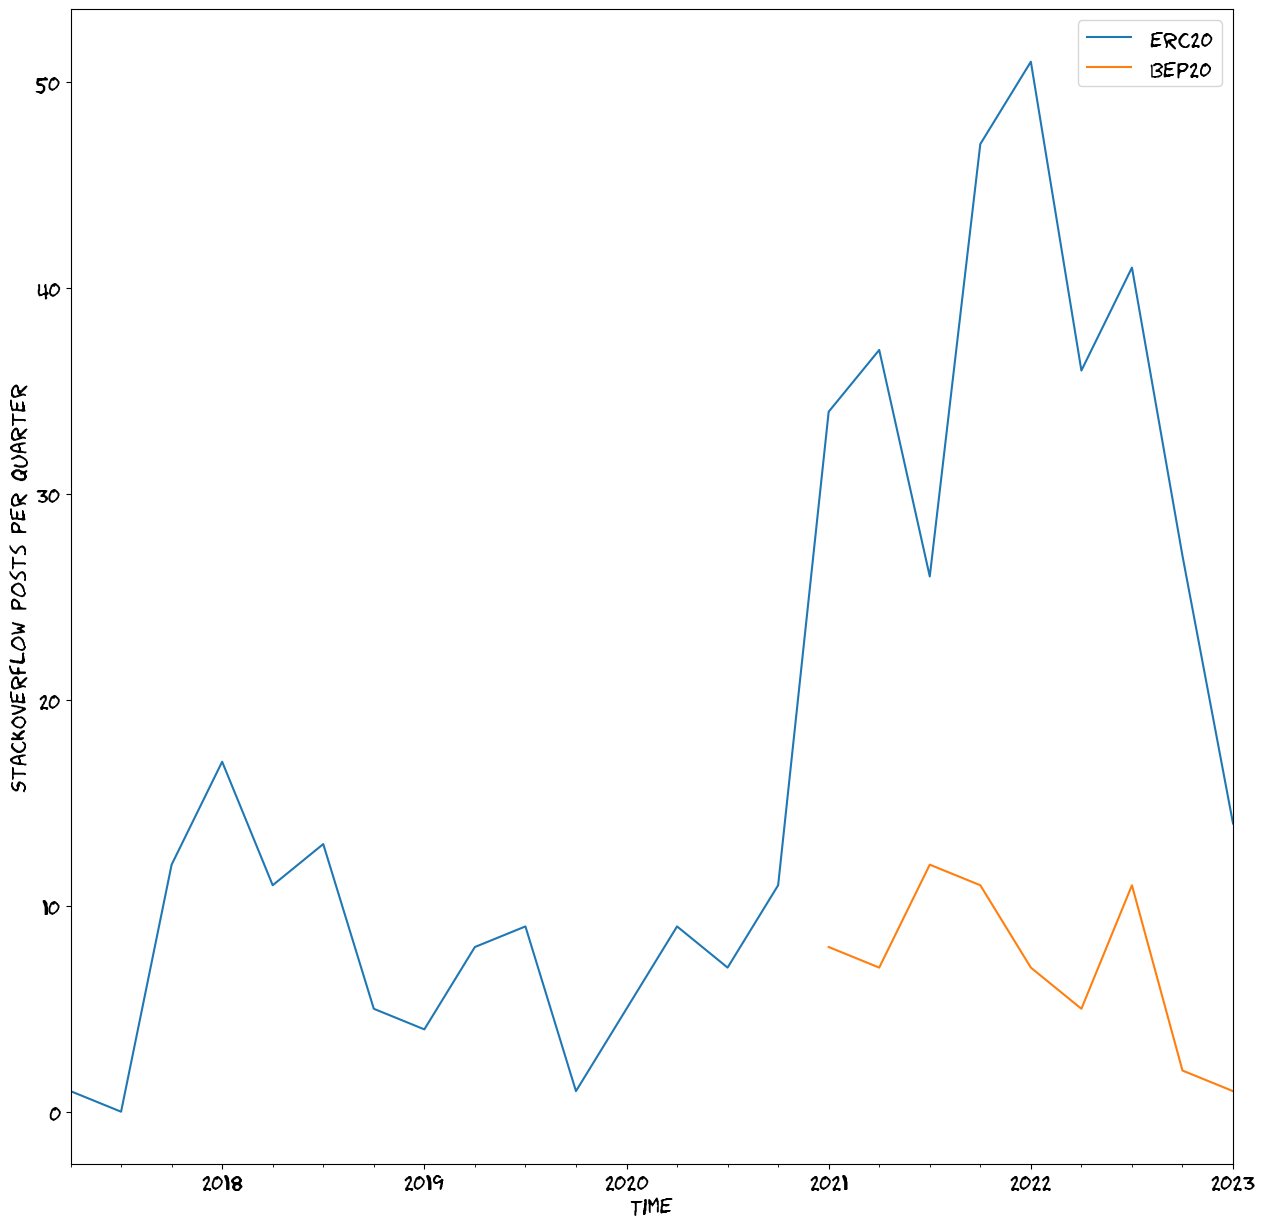

In [75]:

quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "erc20": ("erc20",),
        "bep20": ("bep20",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

Text(0, 0.5, 'StackOverflow posts per quarter')

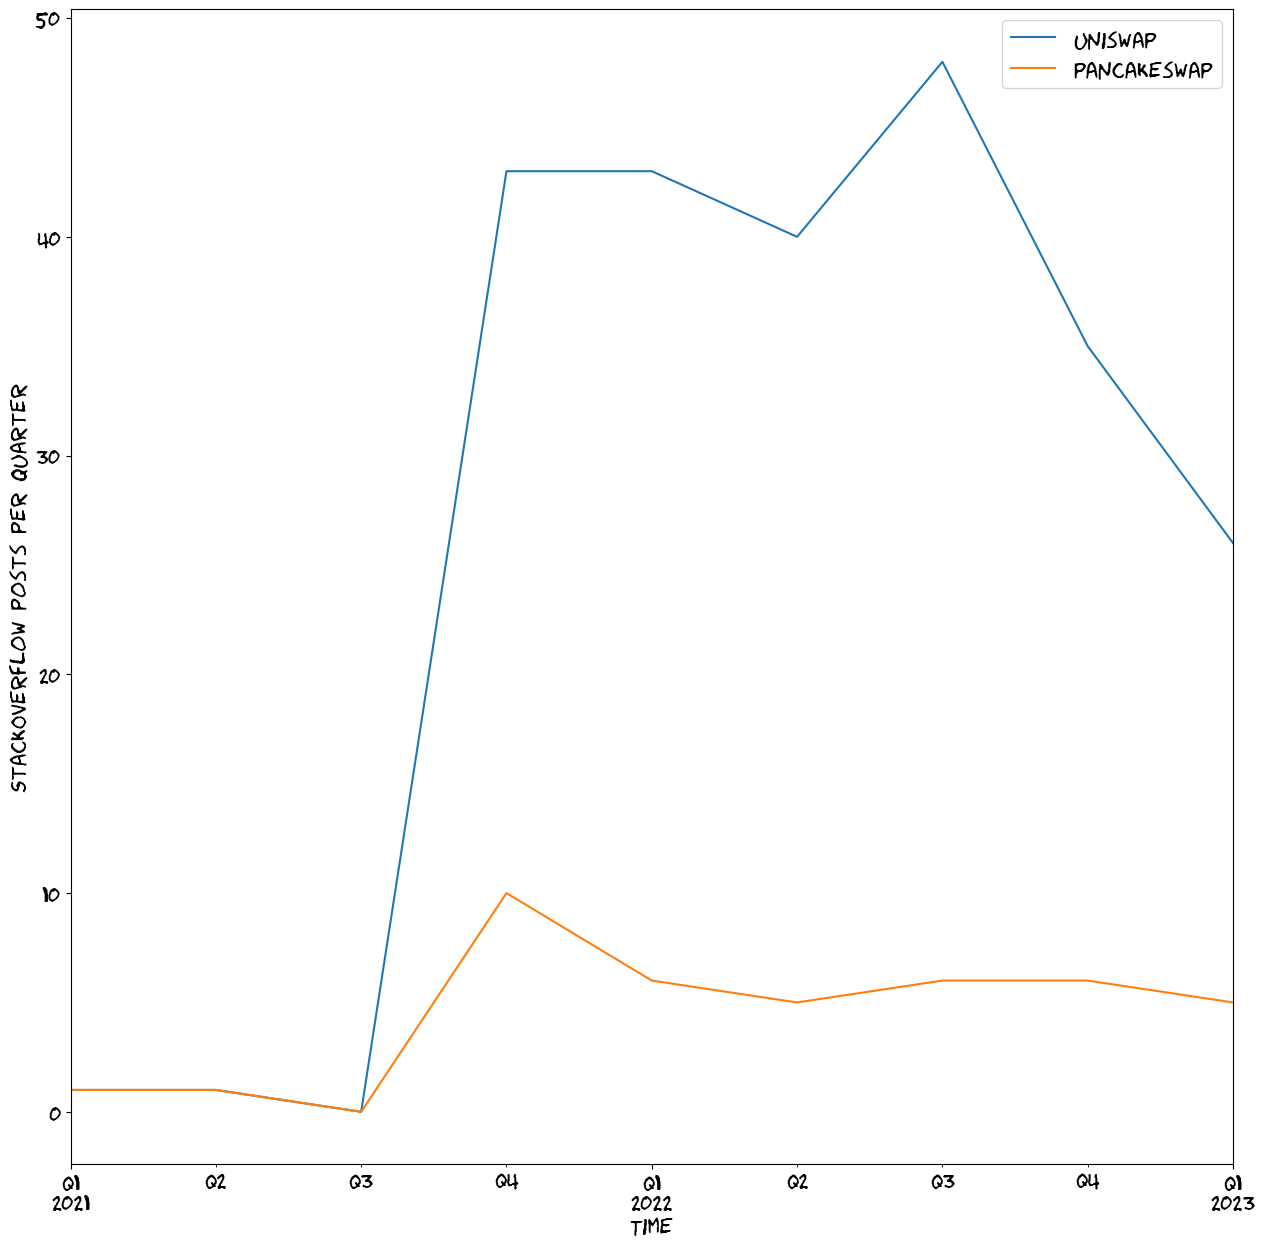

In [76]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "uniswap": ("uniswap",),
        "pancakeswap": ("pancakeswap",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Fungible vs. non-fungible tokens

- How NFTs compare against value tokens

Text(0, 0.5, 'StackOverflow posts per quarter')

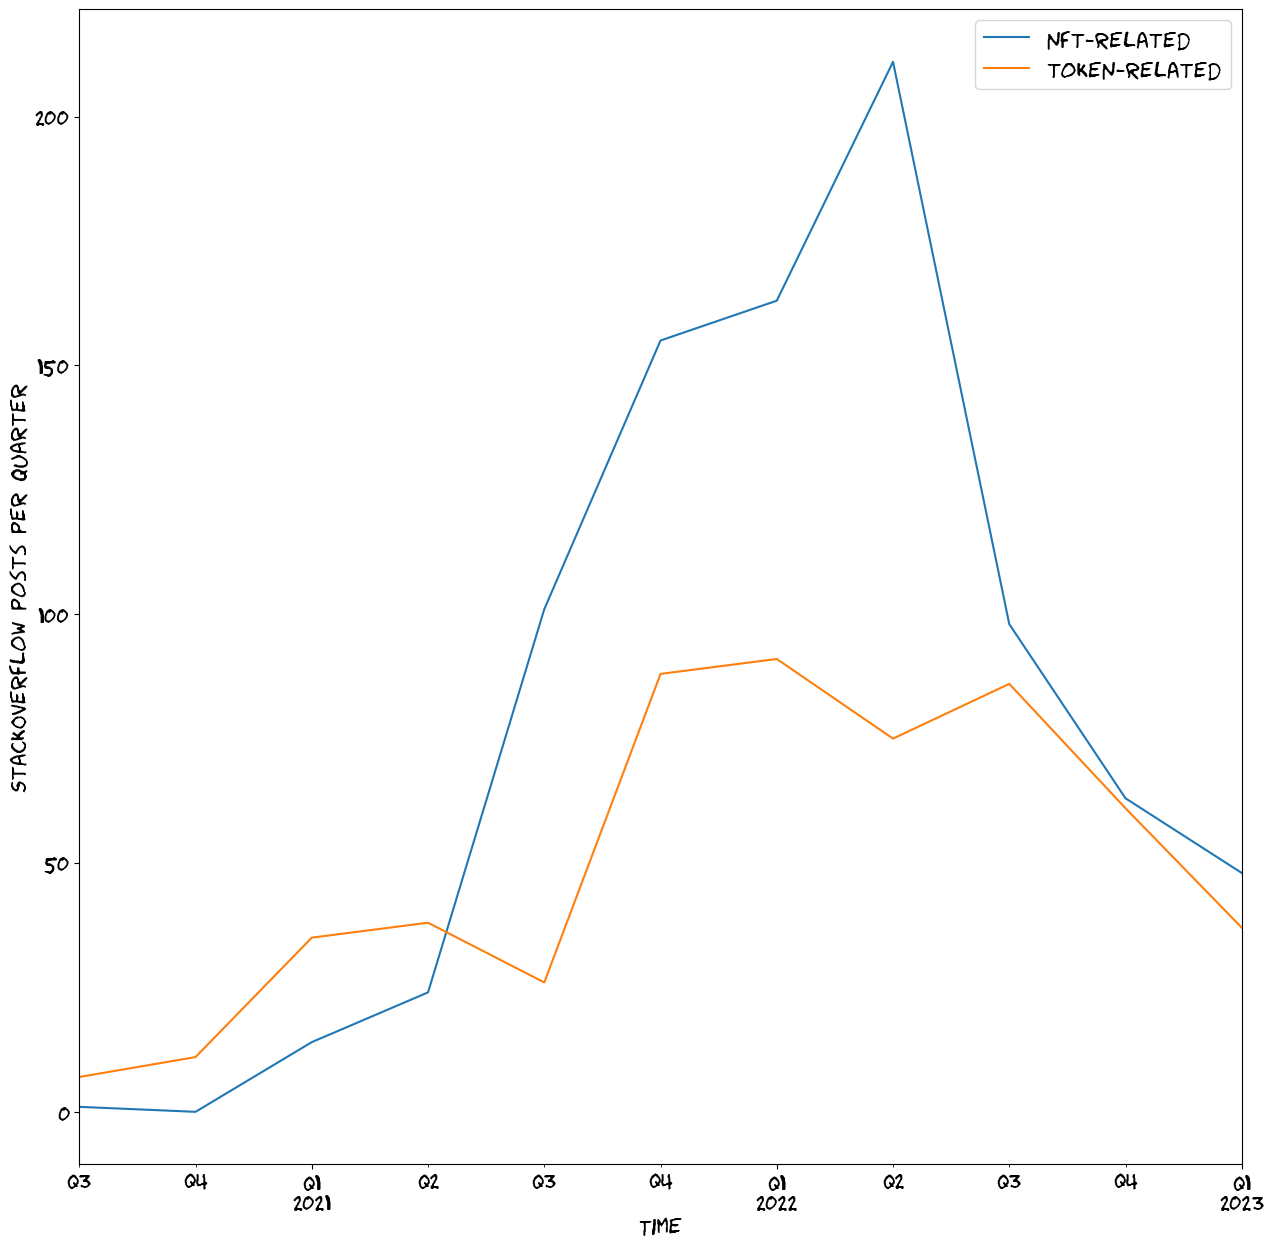

In [78]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "nft-related": ("nft", "metaplex", "opensea"),
        "token-related": ("erc20", "uniswap"),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Ethereum JavaScript vs. Python

- We see how the top two languages, JavaScript and Python, have integration library related questions

Text(0, 0.5, 'StackOverflow posts per quarter')

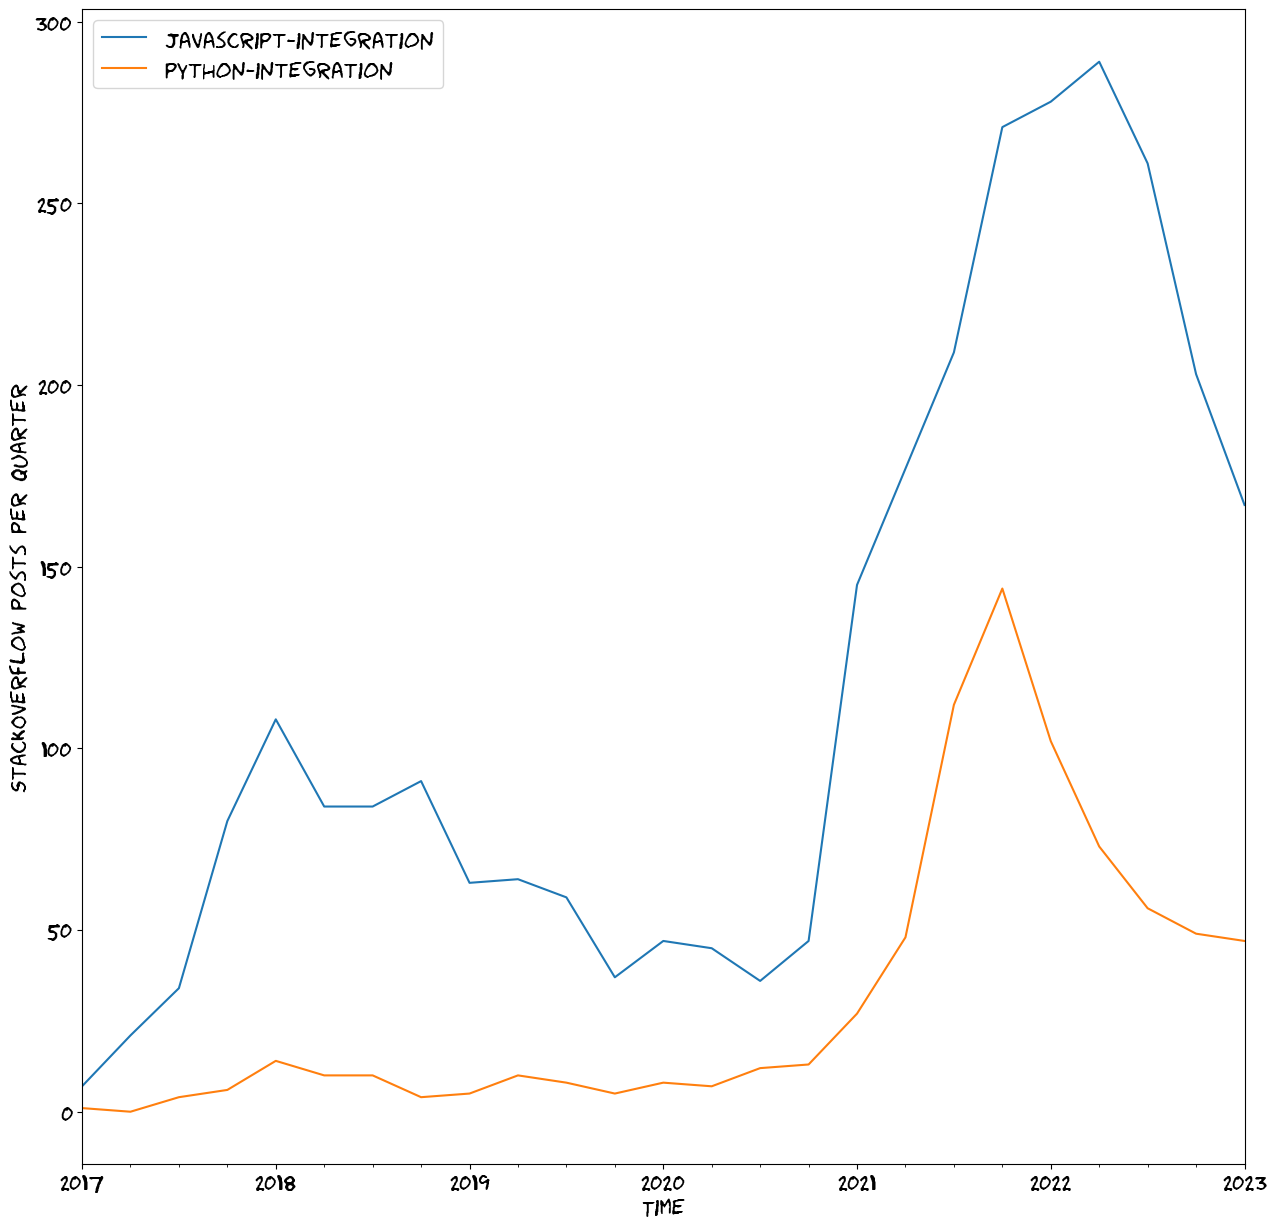

In [79]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "javascript-integration": ("web3js", "ethers.js"),
        "python-integration": ("web3py", "brownie"),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Smart contract framework showdown

- Compare popularity of different smart contract development frameworks
- Foundry is taking over from Truffle and Hardhat
- Foundry is too new to be included here
- Foundry support is mostly kindling support on the community Telegram chat
- Brownie is now unmaintained and being replaced by Ape 

Text(0, 0.5, 'StackOverflow posts per quarter')

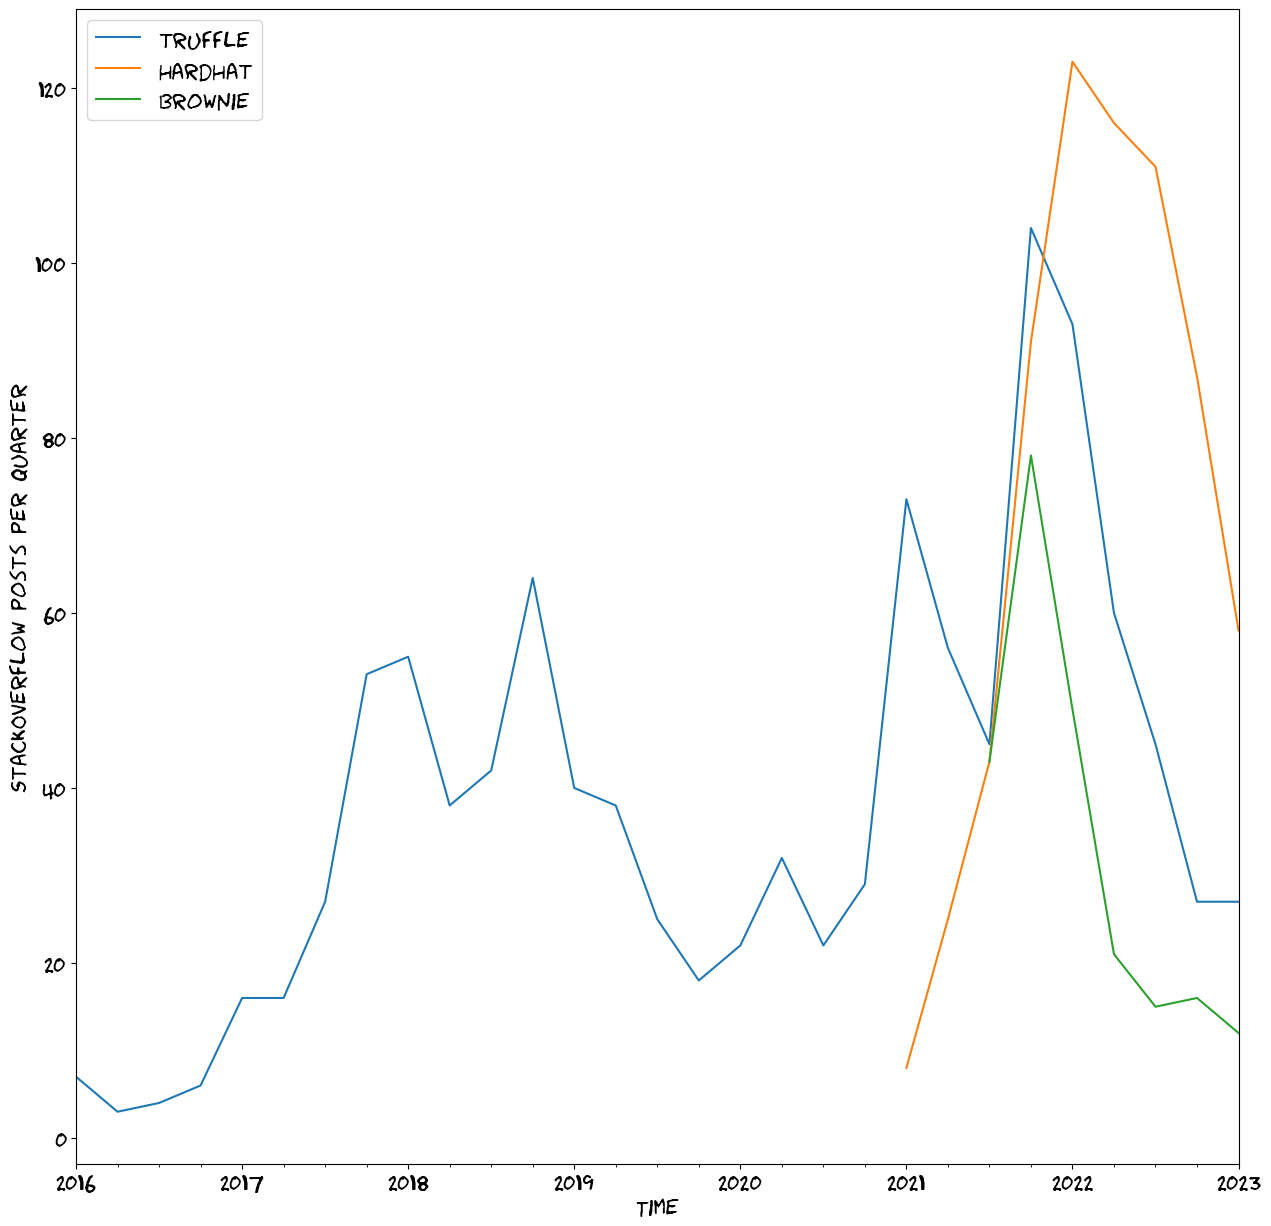

In [81]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "truffle": ("truffle",),
        "hardhat": ("hardhat",),
        "brownie": ("brownie",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Solana breakdown

- What are the various Solana sub-tags doing



Text(0, 0.5, 'StackOverflow posts per quarter')

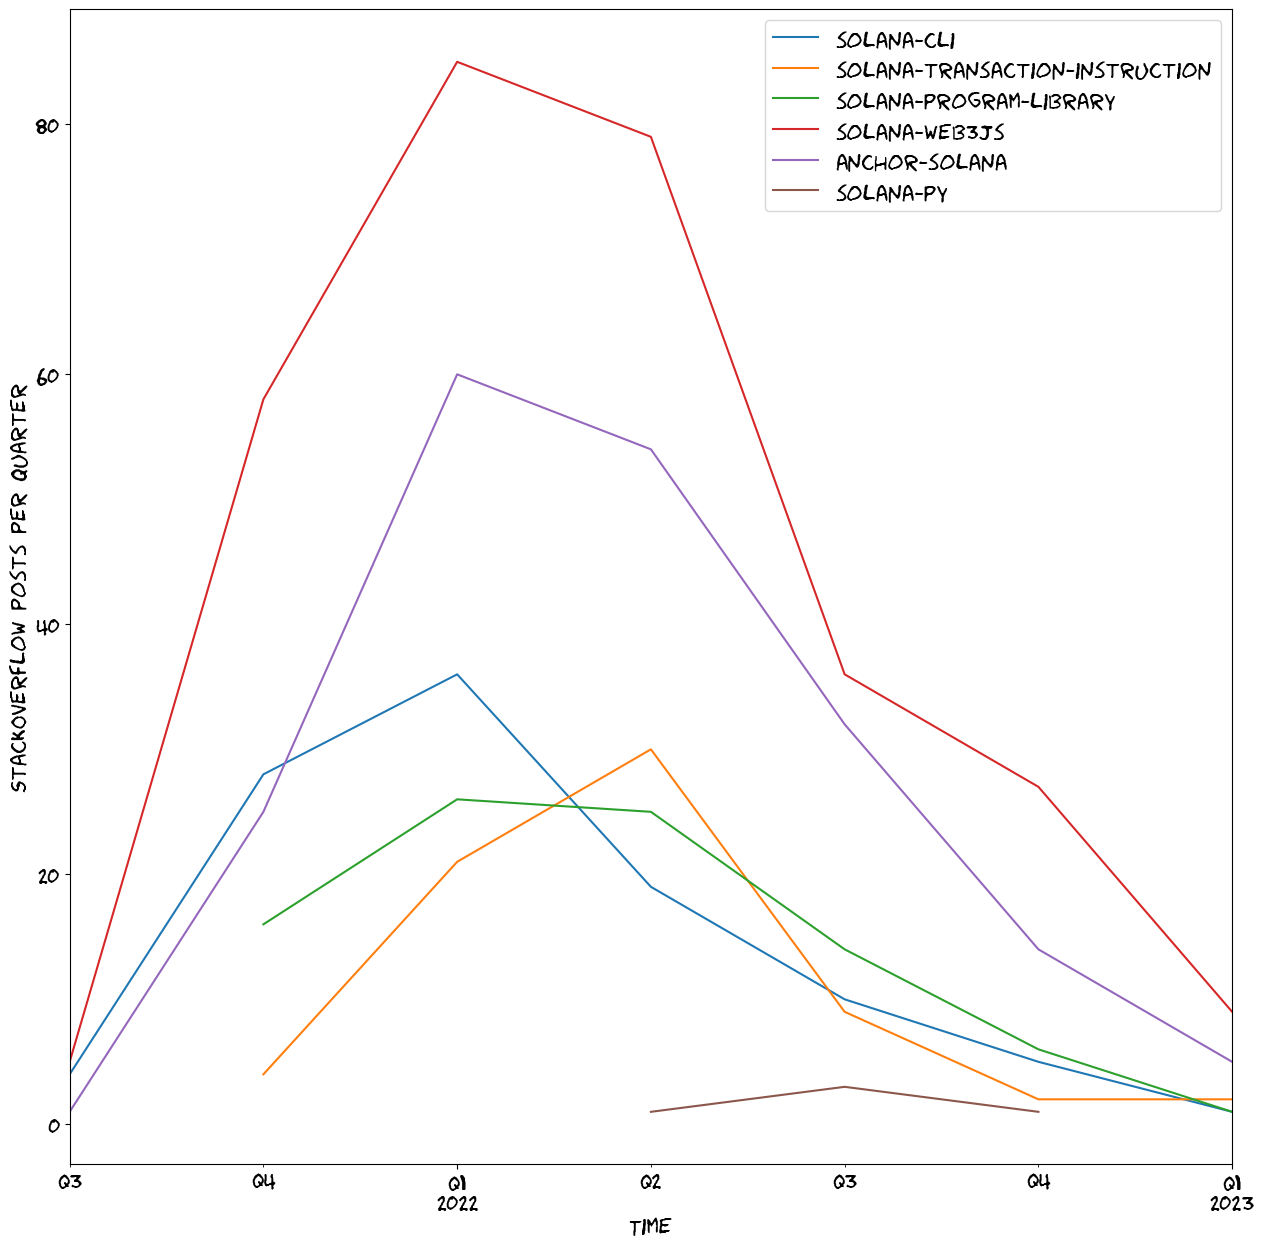

In [83]:
sol_sub_tags = [
    "solana-cli",
    "solana-transaction-instruction",
    "solana-program-library",
    "solana-web3js",
    "anchor-solana",
    "solana-py",    
]

quaterly_binned = create_binned_df_by_tags(
    df, 
    {tag: (tag,) for tag in sol_sub_tags}, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")